## Things to Import

In [ ]:
#!pip uninstall tensorflow
#Y
#from tensorflow import keras
#from tensorflow.keras import layers

In [6]:
#import tensorflow as tf
#import shs

In [6]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
#from tensorflow.keras.utils import to_categorical ## specific  one I wanna use
from tensorflow.keras import utils
#from tensorflow.keras.layers import Input, Dense, Dropout  # Specific ones I wanna use, can just import whole module
from tensorflow.keras import layers 
from tensorflow.keras.models import Model

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

In [ ]:
#!pip install tables
#y
#import tables

In [1]:
#!pip install h5py pandas numpy tables
#!pip install tables
#!pip install matplotlib
import pandas as pd
import h5py
import tables
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras




In [ ]:
import tensorflow as tf

In [4]:
x=5
y=7
print(x+y)

12


# Data Sets we're using

TTToHadronic - ttbar background, differncee is how the tops decay, well the W's (look at photo 18/11/22)
Less events, not that much missing energy, despite larger cross section (66% by memory)

TTToSemiLeptonic - ttbar background, will look most like signal probably, largest  signal expect

TTTo2L2Nu - ttbar background
Small cross secton, W -> lepton neutrino 11%, less jets in this mode, so shouldn't be as easy mistaken, for ttH

ttH125 - Signal

## Opening File TTToHadronic, and a list of columns

HT = total momentum come out from
Higher = less likely

xs_weight = cross section weight

every entry needs cross section


In [4]:
input_file_1 = "/scratch/ys20884/ml_vars/TTToHadronic/df_ml_inputs.hd5"

with h5py.File(input_file_1, "r") as f:
    print("Contents of the file:")
    for key in f.keys():
        print(key)

df1= pd.read_hdf(input_file_1, key="df")
print("Dataframe columns:")
print(df1.columns)
# df.to_csv("df.csv")
# print(dir(df))

print(df1.cleanedJet_btagDeepB[4])
#print(df.entry)

#df.head()
#df.tail()

print(len(df1))

Contents of the file:
df
Dataframe columns:
Index(['dataset', 'entry', 'BiasedDPhi', 'DiJet_mass', 'HT',
       'InputMet_InputJet_mindPhi', 'InputMet_phi', 'InputMet_pt', 'MHT_phi',
       'MHT_pt', 'MinChi', 'MinOmegaHat', 'MinOmegaTilde',
       'boostedObject_area', 'boostedObject_eta', 'boostedObject_mass',
       'boostedObject_phi', 'boostedObject_pt', 'boostedTop_area',
       'boostedTop_eta', 'boostedTop_mass', 'boostedTop_phi', 'boostedTop_pt',
       'boostedTop_tag', 'boostedV_area', 'boostedV_eta', 'boostedV_mass',
       'boostedV_phi', 'boostedV_pt', 'boostedV_tag', 'cleanedBJet_eta',
       'cleanedBJet_phi', 'cleanedBJet_pt', 'cleanedJet_area',
       'cleanedJet_btagDeepB', 'cleanedJet_chHEF', 'cleanedJet_eta',
       'cleanedJet_mass', 'cleanedJet_neHEF', 'cleanedJet_phi',
       'cleanedJet_pt', 'hashed_filename', 'ncleanedBJet', 'ncleanedJet',
       'weight_nominal', 'xs_weight'],
      dtype='object')
[0.8227539  0.06506348 0.9741211  0.02471924 0.4411621  0.071

## Plot of number of jets histogram 

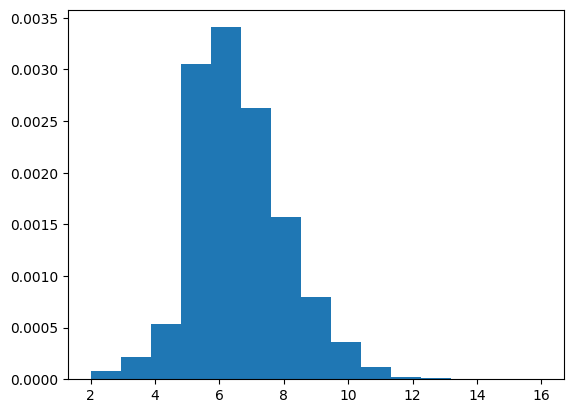

In [3]:
#boosted_top_pt =  df1.boostedTop_pt.values.tolist()
clean_jets =  df1.ncleanedJet.values.tolist()      #dont look like from noise 'good jets'
#print(clean_jets)
#print(np.max(clean_jets))
plt.hist(x=df1.ncleanedJet.values.tolist(), bins=(np.max(clean_jets)-1), weights = df1.xs_weight)
plt.show()




# Plot MHT_pt

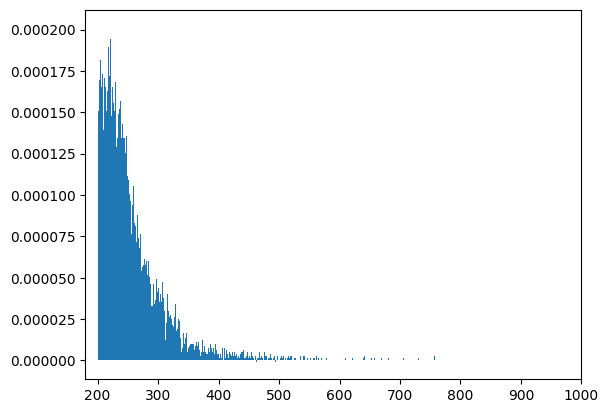

In [4]:

#MHT_pt = df1[MHT_pt].values
MHT_pt1 = df1.MHT_pt.values.tolist()
#print(int(np.max(MHT_pt)-np.min(MHT_pt)))
#MHT_pt
#print(MHT_pt)
plt.hist(x=MHT_pt1, bins=int(np.max(MHT_pt1)-np.min(MHT_pt1)), weights = df1.xs_weight)
plt.xlim(180,1000)
plt.show()

#print(boosted_top_pt)

In [3]:
input_file2 = "/scratch/ys20884/ml_vars/TTToSemiLeptonic/df_ml_inputs.hd5"

with h5py.File(input_file2, "r") as f:
    print("Contents of the file:")
    for key in f.keys():
        print(key)

df2 = pd.read_hdf(input_file2, key="df")
print("Dataframe columns:")
print(df2.columns)

#plots number of jets histogram
#boosted_top_pt =  df.boostedTop_pt.values.tolist()
#clean_jets =  df.ncleanedJet.values.tolist()      #dont look like from noise 'good jets'
##print(clean_jets)
#print(np.max(clean_jets))
#plt.hist(x=clean_jets, bins=(np.max(clean_jets)-1), weights = df.xs_weight)
#plt.show()

#plots MHT pt histogram
#MHT_pt2 = df2.MHT_pt.values.tolist()
#print(MHT_pt)
#plt.hist(x=MHT_pt2, bins=100, weights = df2.xs_weight)
#plt.xlim(180,1000)
#plt.show()

print(len(df2))

Contents of the file:
df
Dataframe columns:
Index(['dataset', 'entry', 'BiasedDPhi', 'DiJet_mass', 'HT',
       'InputMet_InputJet_mindPhi', 'InputMet_phi', 'InputMet_pt', 'MHT_phi',
       'MHT_pt', 'MinChi', 'MinOmegaHat', 'MinOmegaTilde',
       'boostedObject_area', 'boostedObject_eta', 'boostedObject_mass',
       'boostedObject_phi', 'boostedObject_pt', 'boostedTop_area',
       'boostedTop_eta', 'boostedTop_mass', 'boostedTop_phi', 'boostedTop_pt',
       'boostedTop_tag', 'boostedV_area', 'boostedV_eta', 'boostedV_mass',
       'boostedV_phi', 'boostedV_pt', 'boostedV_tag', 'cleanedBJet_eta',
       'cleanedBJet_phi', 'cleanedBJet_pt', 'cleanedJet_area',
       'cleanedJet_btagDeepB', 'cleanedJet_chHEF', 'cleanedJet_eta',
       'cleanedJet_mass', 'cleanedJet_neHEF', 'cleanedJet_phi',
       'cleanedJet_pt', 'hashed_filename', 'ncleanedBJet', 'ncleanedJet',
       'weight_nominal', 'xs_weight'],
      dtype='object')


Contents of the file:
df
Dataframe columns:
Index(['dataset', 'entry', 'BiasedDPhi', 'DiJet_mass', 'HT',
       'InputMet_InputJet_mindPhi', 'InputMet_phi', 'InputMet_pt', 'MHT_phi',
       'MHT_pt', 'MinChi', 'MinOmegaHat', 'MinOmegaTilde',
       'boostedObject_area', 'boostedObject_eta', 'boostedObject_mass',
       'boostedObject_phi', 'boostedObject_pt', 'boostedTop_area',
       'boostedTop_eta', 'boostedTop_mass', 'boostedTop_phi', 'boostedTop_pt',
       'boostedTop_tag', 'boostedV_area', 'boostedV_eta', 'boostedV_mass',
       'boostedV_phi', 'boostedV_pt', 'boostedV_tag', 'cleanedBJet_eta',
       'cleanedBJet_phi', 'cleanedBJet_pt', 'cleanedJet_area',
       'cleanedJet_btagDeepB', 'cleanedJet_chHEF', 'cleanedJet_eta',
       'cleanedJet_mass', 'cleanedJet_neHEF', 'cleanedJet_phi',
       'cleanedJet_pt', 'hashed_filename', 'ncleanedBJet', 'ncleanedJet',
       'weight_nominal', 'xs_weight'],
      dtype='object')


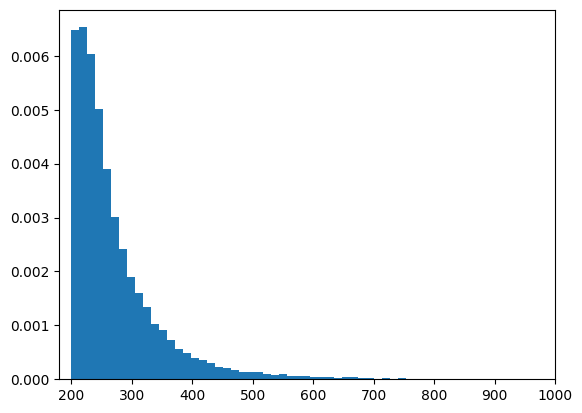

In [6]:
input_file3 = "/scratch/ys20884/ml_vars/TTTo2L2Nu/df_ml_inputs.hd5"

with h5py.File(input_file3, "r") as f:
    print("Contents of the file:")
    for key in f.keys():
        print(key)

df3 = pd.read_hdf(input_file3, key="df")
print("Dataframe columns:")
print(df3.columns)

#plots histogram of no. jets
#boosted_top_pt =  df.boostedTop_pt.values.tolist()
#clean_jets =  df.ncleanedJet.values.tolist()      #dont look like from noise 'good jets'
##print(clean_jets)
#print(np.max(clean_jets))
#plt.hist(x=clean_jets, bins=(np.max(clean_jets)-1), weights = df.xs_weight)
#plt.show()

#plots MHT pt histogram
MHT_pt3 = df3.MHT_pt.values.tolist()
#print(MHT_pt)
plt.hist(x=MHT_pt3, bins=100, weights = df3.xs_weight)
plt.xlim(180,1000)
plt.show()

print(len(df3))


In [2]:
input_file4 = "/scratch/ys20884/ml_vars/ttH125/df_ml_inputs.hd5"

with h5py.File(input_file4, "r") as f:
    print("Contents of the file:")
    for key in f.keys():
        print(key)

df4 = pd.read_hdf(input_file4, key="df")
print("Dataframe columns:")
print(df4.columns)

#PLots histogram of no.jets
#boosted_top_pt =  df.boostedTop_pt.values.tolist()
#clean_jets =  df.ncleanedJet.values.tolist()      #dont look like from noise 'good jets'
##print(clean_jets)
#print(np.max(clean_jets))
#plt.hist(x=clean_jets, bins=(np.max(clean_jets)-1), weights = df.xs_weight)
#plt.show()

#plots MHT pt histogram
#MHT_pt4 = df4.MHT_pt.values.tolist()
#print(MHT_pt)
#plt.hist(x=MHT_pt4, bins=100, weights = df4.xs_weight)
#plt.xlim(180,1000)
#plt.show()
print(len(df4))

Contents of the file:
df
Dataframe columns:
Index(['dataset', 'entry', 'BiasedDPhi', 'DiJet_mass', 'HT',
       'InputMet_InputJet_mindPhi', 'InputMet_phi', 'InputMet_pt', 'MHT_phi',
       'MHT_pt', 'MinChi', 'MinOmegaHat', 'MinOmegaTilde',
       'boostedObject_area', 'boostedObject_eta', 'boostedObject_mass',
       'boostedObject_phi', 'boostedObject_pt', 'boostedTop_area',
       'boostedTop_eta', 'boostedTop_mass', 'boostedTop_phi', 'boostedTop_pt',
       'boostedTop_tag', 'boostedV_area', 'boostedV_eta', 'boostedV_mass',
       'boostedV_phi', 'boostedV_pt', 'boostedV_tag', 'cleanedBJet_eta',
       'cleanedBJet_phi', 'cleanedBJet_pt', 'cleanedJet_area',
       'cleanedJet_btagDeepB', 'cleanedJet_chHEF', 'cleanedJet_eta',
       'cleanedJet_mass', 'cleanedJet_neHEF', 'cleanedJet_phi',
       'cleanedJet_pt', 'hashed_filename', 'ncleanedBJet', 'ncleanedJet',
       'weight_nominal', 'xs_weight'],
      dtype='object')
177858


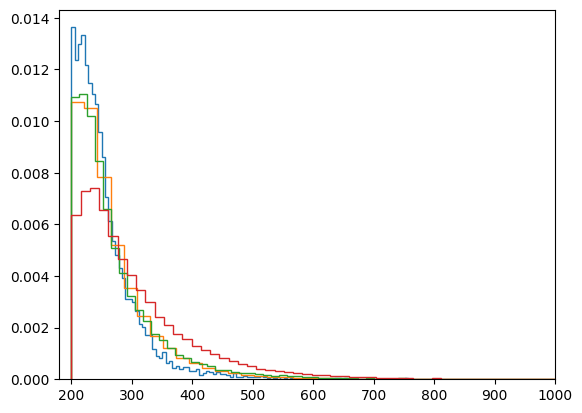

In [14]:
plt.hist(x=MHT_pt1, bins=100, weights = df1.xs_weight, histtype = 'step', density = True)
plt.hist(x=MHT_pt2, bins=100, weights = df2.xs_weight, histtype = 'step', density = True)
plt.hist(x=MHT_pt3, bins=100, weights = df3.xs_weight, histtype = 'step', density = True)
plt.hist(x=MHT_pt4, bins=100, weights = df4.xs_weight, histtype = 'step', density = True)
plt.xlim(xmin=180, xmax = 1000)
plt.show()

(array([3.92750451e-02, 4.20043374e-02, 6.72821881e-02, 3.59405863e-01,
        2.85772354e-01, 1.63343117e-01, 7.63564462e-02, 2.89445413e-02,
        1.01073132e-02, 3.15016593e-03, 9.11890126e-04, 2.74204737e-04,
        7.01453975e-05, 2.55074163e-05]),
 array([ 2.        ,  2.92857143,  3.85714286,  4.78571429,  5.71428571,
         6.64285714,  7.57142857,  8.5       ,  9.42857143, 10.35714286,
        11.28571429, 12.21428571, 13.14285714, 14.07142857, 15.        ]),
 [<matplotlib.patches.Polygon at 0x7fa4334bb1c0>])

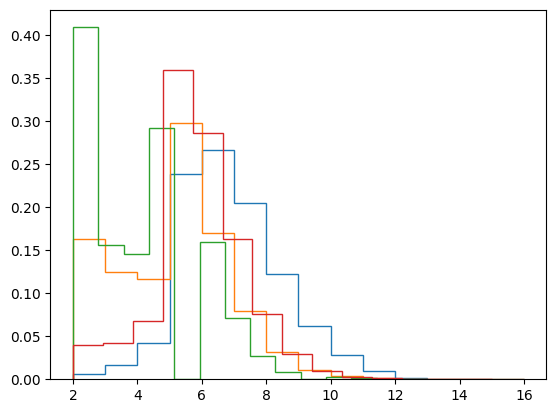

In [21]:
no_jet1 = df1['ncleanedJet']  #TTToHadronic
no_jet2 = df2['ncleanedJet']  #TTtoSemiLeptonic
no_jet3 = df3['ncleanedJet']  #TTToL
no_jet4 = df4['ncleanedJet']



plt.hist(x=no_jet1, bins= int(np.max(no_jet1)-np.min(no_jet1)), weights = df1.xs_weight, density = True, histtype = 'step', label = '1')
plt.hist(x=no_jet2, bins= int(np.max(no_jet2)-np.min(no_jet2)), weights = df2.xs_weight, density = True, histtype = 'step')
plt.hist(x=no_jet3, bins= int(np.max(no_jet1)-np.min(no_jet1)), weights = df3.xs_weight, density = True, histtype = 'step')
plt.hist(x=no_jet4, bins= int(np.max(no_jet1)-np.min(no_jet1)), weights = df4.xs_weight, density = True, histtype = 'step')


In [10]:
print(len(df1))
print(len(df2))
print(len(df3))
print(len(df4))
print(no_jet2)

12185
651387
39666
177858
0         2
1         5
2         2
3         3
4         4
         ..
651382    4
651383    4
651384    5
651385    2
651386    6
Name: ncleanedJet, Length: 651387, dtype: int64


# Plotting everything possbile

'dataset' - Just the name of the Dataset, no plot

'entry', - Doesn't need plot

'BiasedDPhi', Done

'DiJet_mass', Done

'HT', Done
              
'InputMet_InputJet_mindPhi', Done

'InputMet_phi', Done

'InputMet_pt', 

'MHT_phi',

'MHT_pt',

'MinChi', 

'MinOmegaHat',

'MinOmegaTilde',


'boostedObject_area',

'boostedObject_eta', 

'boostedObject_mass',


'boostedObject_phi', 

'boostedObject_pt', 

'boostedTop_area',

'boostedTop_eta', 

'boostedTop_mass',

'boostedTop_phi',

'boostedTop_pt',


'boostedTop_tag', 

'boostedV_area', 

'boostedV_eta', 

'boostedV_mass',


'boostedV_phi', 

'boostedV_pt', 

'boostedV_tag',

'cleanedBJet_eta',


'cleanedBJet_phi', 

'cleanedBJet_pt',

'cleanedJet_area',

'cleanedJet_btagDeepB',

'cleanedJet_chHEF',

'cleanedJet_eta',

'cleanedJet_mass',

'cleanedJet_neHEF', 

'cleanedJet_phi',

'cleanedJet_pt',

'hashed_filename',

'ncleanedBJet', 

'ncleanedJet',

'weight_nominal',

'xs_weight'], -  A value in this in the dataset seems to have a -ive value, I assume it shoudlnt

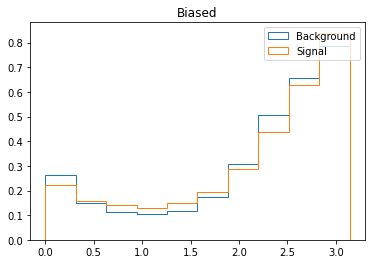

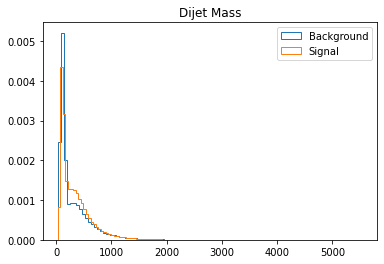

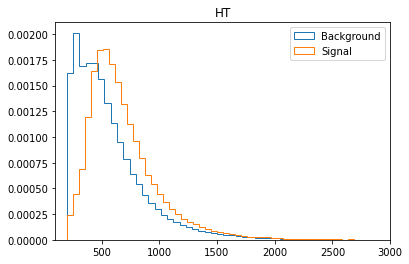

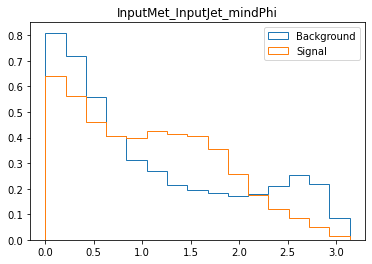

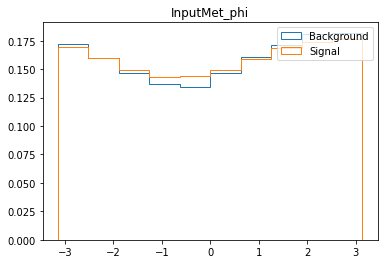

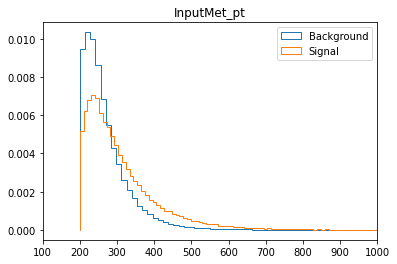

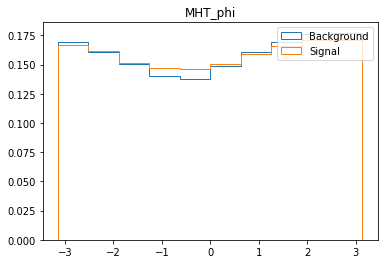

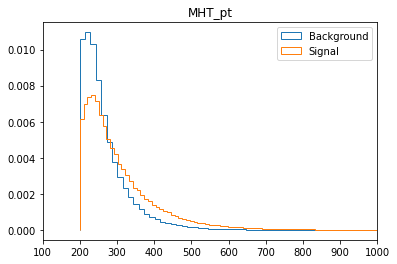

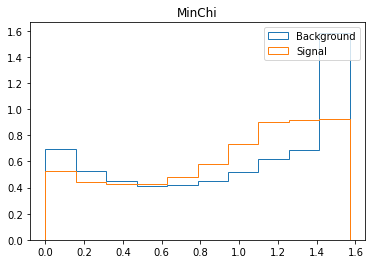

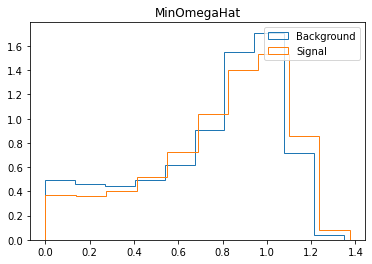

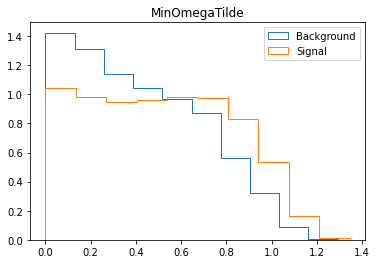

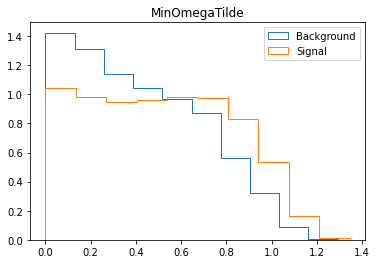

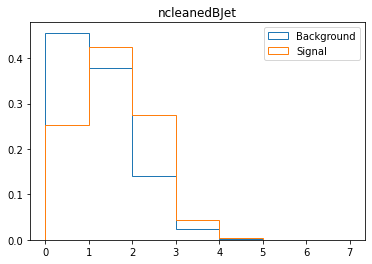

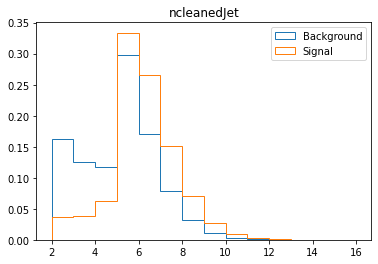

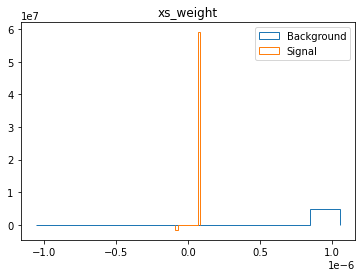

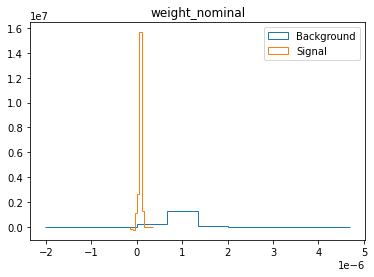

In [4]:

#%%timeit -r 1   # times how long the cell takes to run   #must be first thing in the cell
#4s to run

#Easy Ones (just plot with no manipulation)

#plots all normalised

semi_Biased = df2['BiasedDPhi']
signal_Biased = df4['BiasedDPhi']
plt.hist(x=semi_Biased, bins = 10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_Biased, bins = 10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('Biased')
plt.legend()
plt.show()

semi_DiJet_mass = df2['DiJet_mass']
signal_DiJet_mass = df4['DiJet_mass']
plt.hist(x=semi_DiJet_mass, bins =100, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_DiJet_mass, bins =100, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('Dijet Mass')
plt.legend()
#plt.xlim(0,2500)
plt.show()   #are some jets w/ like 5000 mass, anomolous

semi_HT = df2['HT']
signal_HT = df4['HT']
plt.hist(x=semi_HT, bins = 100, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_HT, bins = 100, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('HT')
plt.legend()
plt.xlim(100, 3000)
plt.show()

semi_metjetphi= df2['InputMet_InputJet_mindPhi']
signal_metjetphi= df4['InputMet_InputJet_mindPhi']
plt.hist(x=semi_metjetphi, bins =15, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_metjetphi, bins =15, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('InputMet_InputJet_mindPhi')
plt.legend()
plt.show()

semi_InputMet_phi= df2['InputMet_phi']
signal_InputMet_phi= df4['InputMet_phi']
plt.hist(x=semi_InputMet_phi, bins =10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_InputMet_phi, bins =10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('InputMet_phi')
plt.legend()
plt.show()

semi_InputMet_pt= df2['InputMet_pt']
signal_InputMet_pt= df4['InputMet_pt']
plt.hist(x=semi_InputMet_pt, bins = 150, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_InputMet_pt, bins = 150, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('InputMet_pt')
plt.legend()
plt.xlim(100,1000)
plt.show()

semi_MHT_phi= df2['MHT_phi']
signal_MHT_phi= df4['MHT_phi']
plt.hist(x=semi_MHT_phi, bins =10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_MHT_phi, bins =10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('MHT_phi')
plt.legend()
plt.show()

semi_MHT_pt= df2['MHT_pt']
signal_MHT_pt= df4['MHT_pt']
plt.hist(x=semi_MHT_pt, bins = 150 , weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_MHT_pt, bins = 150 , weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('MHT_pt')
plt.legend()
plt.xlim(100,1000)
plt.show() 

semi_MinChi= df2['MinChi']
signal_MinChi= df4['MinChi']
plt.hist(x=semi_MinChi, bins =10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_MinChi, bins =10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('MinChi')
plt.legend()
plt.show()

semi_MinOmegaHat= df2['MinOmegaHat']
signal_MinOmegaHat= df4['MinOmegaHat']
plt.hist(x=semi_MinOmegaHat, bins =10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_MinOmegaHat, bins =10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('MinOmegaHat')
plt.legend()
plt.show()

semi_MinOmegaTilde= df2['MinOmegaTilde']
signal_MinOmegaTilde= df4['MinOmegaTilde']
plt.hist(x=semi_MinOmegaTilde, bins =10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_MinOmegaTilde, bins =10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('MinOmegaTilde')
plt.legend()
plt.show()

semi_MinOmegaTilde= df2['MinOmegaTilde']
signal_MinOmegaTilde= df4['MinOmegaTilde']
plt.hist(x=semi_MinOmegaTilde, bins =10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_MinOmegaTilde, bins =10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('MinOmegaTilde')
plt.legend()
plt.show() 

semi_ncleanedBJet = df2['ncleanedBJet']   #bins need manipulating (did already)
signal_ncleanedBJet = df4['ncleanedBJet']
plt.hist(x=semi_ncleanedBJet, bins = int(np.max(df2['ncleanedBJet']) - np.min(df2['ncleanedBJet'])), weights = df2.xs_weight, density = True, histtype = 'step',  label = 'Background')
plt.hist(x=signal_ncleanedBJet, bins = int(np.max(df4['ncleanedBJet']) - np.min(df4['ncleanedBJet'])), weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('ncleanedBJet')
plt.legend()
plt.show() 

semi_ncleanedJet = df2['ncleanedJet']   #bins need manipulating (did already)
signal_ncleanedJet = df4['ncleanedJet']
plt.hist(x=semi_ncleanedJet, bins = int(np.max(df2['ncleanedJet']) - np.min(df2['ncleanedJet'])), weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_ncleanedJet, bins = int(np.max(df4['ncleanedJet']) - np.min(df4['ncleanedJet'])), weights = df4.xs_weight, density = True, histtype = 'step' , label = 'Signal')
plt.title('ncleanedJet')
plt.legend()
plt.show() 

semi_xs_weight = df2['xs_weight']   # plot to show is wrong, at least 1 -ive val (is this right?)
signal_xs_weight = df4['xs_weight'] 
plt.hist(x=semi_xs_weight, bins = 10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_xs_weight, bins = 10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('xs_weight')
plt.legend()
plt.show() 

semi_weight_nominal = df2['weight_nominal']   # plot to check seems reasonable
signal_weight_nominal = df4['weight_nominal']
plt.hist(x=semi_weight_nominal, bins = 10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_weight_nominal, bins = 10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('weight_nominal')
plt.legend()
plt.show() 

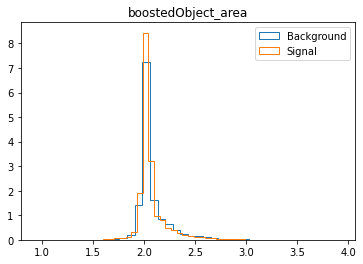

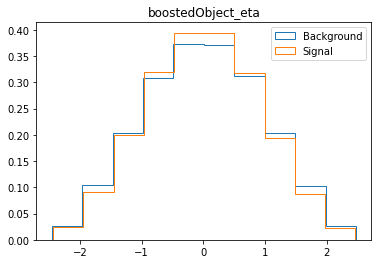

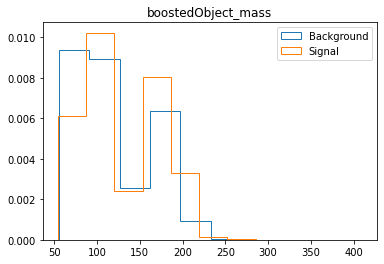

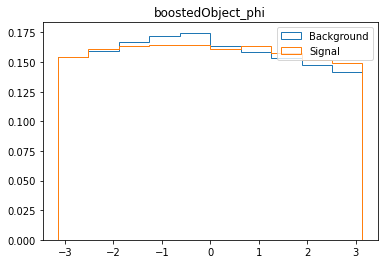

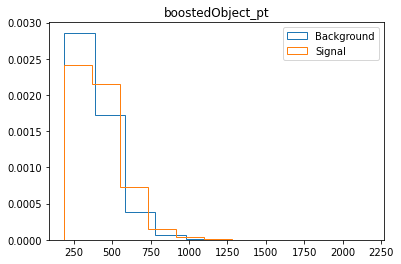

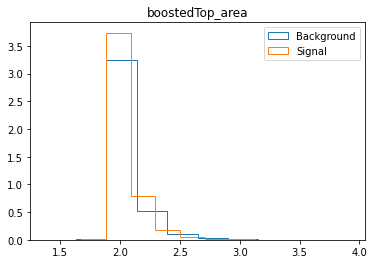

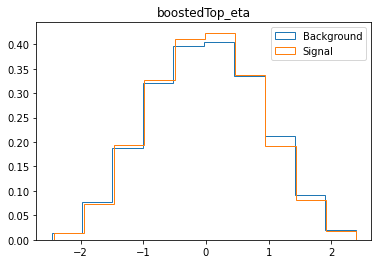

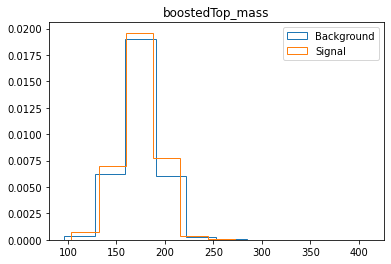

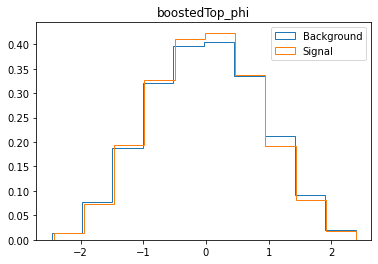

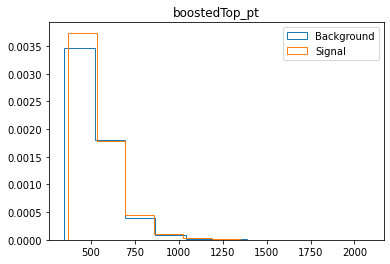

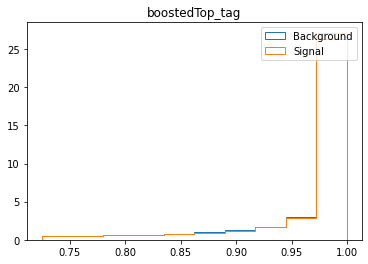

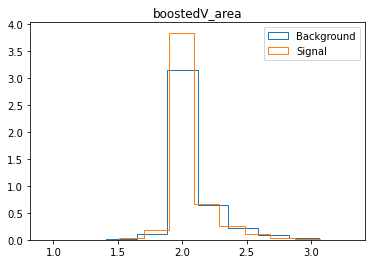

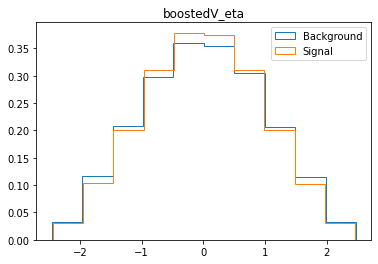

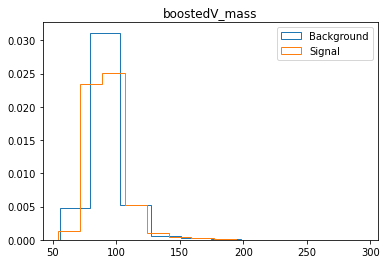

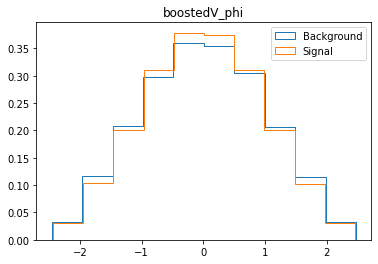

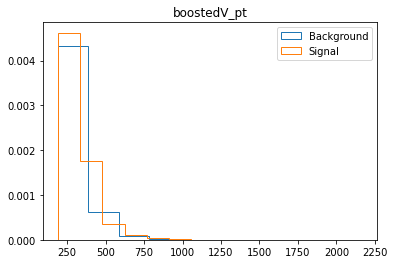

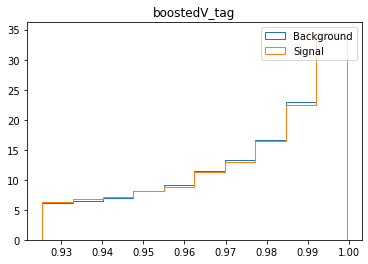

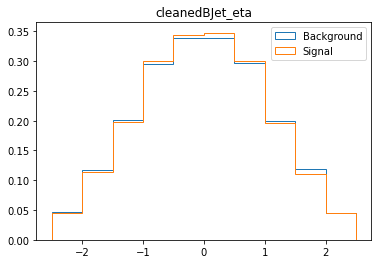

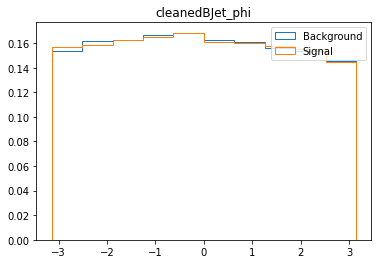

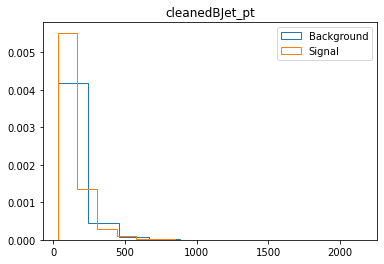

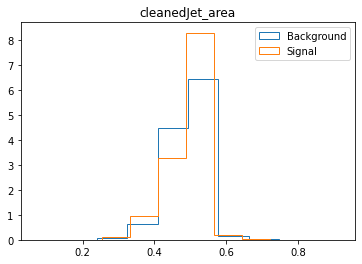

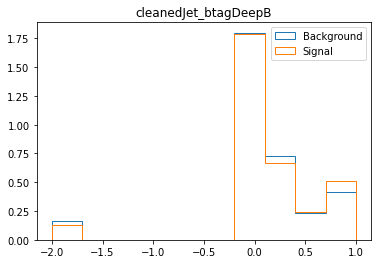

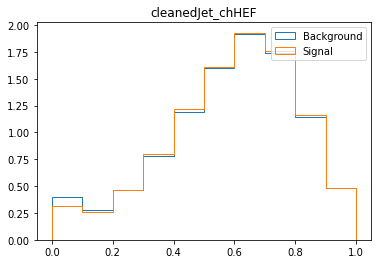

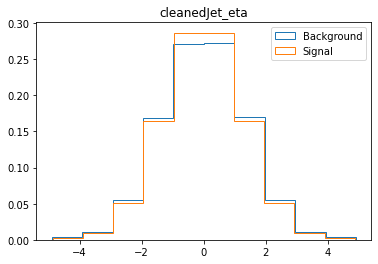

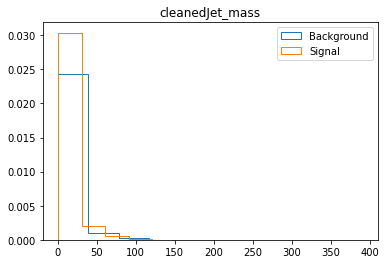

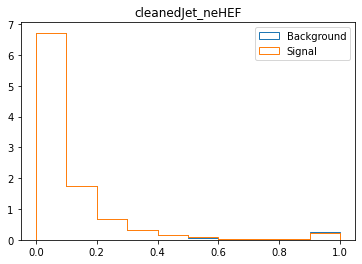

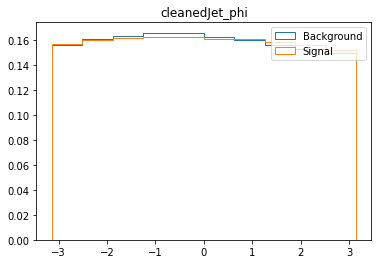

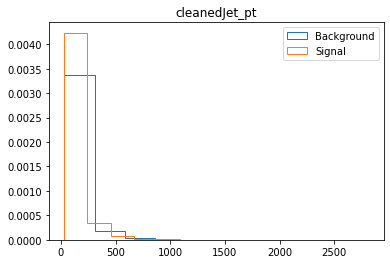

In [5]:
#%%timeit -r 1   # times how long the cell takes to run   #must be first thing in the cell
# takes 3min 21s to run lol

# Not so easy, i.e. data needs manipulating, look at onehot encoder etc what to do w/ missing lavues on kaggle.

# boosted jets are mostly empty, so need to work out what to do with this data

# I believe all of the below have the same issue of empty numbers in the array
 
# plotting takes ages, so would recomend copy and paste on wanted

# plots normalised

# really inefficient code, could easy do as a loop now.
semi_boostedObject_area = df2['boostedObject_area']
semi_boostedObject_area_lst=[]
for i in semi_boostedObject_area:       
    if i.size>0:
        for j in i:
            semi_boostedObject_area_lst.append(j)
signal_boostedObject_area = df4['boostedObject_area']
signal_boostedObject_area_lst=[]
for i in signal_boostedObject_area:       
    if i.size>0:
        for j in i:
            signal_boostedObject_area_lst.append(j)
plt.hist(x=semi_boostedObject_area_lst, bins =40,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedObject_area_lst, bins =40,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedObject_area')
plt.legend()
plt.show() 


semi_boostedObject_eta = df2['boostedObject_eta']
semi_boostedObject_eta_lst=[]
for i in semi_boostedObject_eta:       
    if i.size>0:
        for j in i:
            semi_boostedObject_eta_lst.append(j)  
signal_boostedObject_eta = df4['boostedObject_eta']
signal_boostedObject_eta_lst=[]
for i in signal_boostedObject_eta:       
    if i.size>0:
        for j in i:
            signal_boostedObject_eta_lst.append(j)  
plt.hist(x=semi_boostedObject_eta_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedObject_eta_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedObject_eta')
plt.legend()
plt.show() 

semi_boostedObject_mass= df2['boostedObject_mass']
semi_boostedObject_mass_lst=[]
for i in semi_boostedObject_mass:       
    if i.size>0:
        for j in i:
            semi_boostedObject_mass_lst.append(j) 
signal_boostedObject_mass= df4['boostedObject_mass']
signal_boostedObject_mass_lst=[]
for i in signal_boostedObject_mass:       
    if i.size>0:
        for j in i:
            signal_boostedObject_mass_lst.append(j)
plt.hist(x=semi_boostedObject_mass_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedObject_mass_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedObject_mass')
plt.legend()
plt.show() 

semi_boostedObject_phi= df2['boostedObject_phi']
semi_boostedObject_phi_lst=[]
for i in semi_boostedObject_phi:       
    if i.size>0:
        for j in i:
            semi_boostedObject_phi_lst.append(j)
signal_boostedObject_phi= df4['boostedObject_phi']
signal_boostedObject_phi_lst=[]
for i in signal_boostedObject_phi:       
    if i.size>0:
        for j in i:
            signal_boostedObject_phi_lst.append(j)
plt.hist(x=semi_boostedObject_phi_lst , bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedObject_phi_lst , bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedObject_phi')
plt.legend()
plt.show() 

semi_boostedObject_pt= df2['boostedObject_pt']
semi_boostedObject_pt_lst=[]
for i in semi_boostedObject_pt:       
    if i.size>0:
        for j in i:
            semi_boostedObject_pt_lst.append(j)
signal_boostedObject_pt= df4['boostedObject_pt']
signal_boostedObject_pt_lst=[]
for i in signal_boostedObject_pt:       
    if i.size>0:
        for j in i:
            signal_boostedObject_pt_lst.append(j)            
plt.hist(x=semi_boostedObject_pt_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedObject_pt_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('boostedObject_pt')
plt.legend()
plt.show() 

semi_boostedTop_area= df2['boostedTop_area']
semi_boostedTop_area_lst=[]
for i in semi_boostedTop_area:       
    if i.size>0:
        for j in i:
            semi_boostedTop_area_lst.append(j)
signal_boostedTop_area= df4['boostedTop_area']
signal_boostedTop_area_lst=[]
for i in signal_boostedTop_area:       
    if i.size>0:
        for j in i:
            signal_boostedTop_area_lst.append(j)
plt.hist(x=semi_boostedTop_area_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedTop_area_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedTop_area')
plt.legend()
plt.show() 

semi_boostedTop_eta = df2['boostedTop_eta']
semi_boostedTop_eta_lst=[]
for i in semi_boostedTop_eta:       
    if i.size>0:
        for j in i:
            semi_boostedTop_eta_lst.append(j)
signal_boostedTop_eta = df4['boostedTop_eta']
signal_boostedTop_eta_lst=[]
for i in signal_boostedTop_eta:       
    if i.size>0:
        for j in i:
            signal_boostedTop_eta_lst.append(j)
plt.hist(x=semi_boostedTop_eta_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedTop_eta_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedTop_eta')
plt.legend()
plt.show()

semi_boostedTop_mass = df2['boostedTop_mass']
semi_boostedTop_mass_lst=[]
for i in semi_boostedTop_mass:       
    if i.size>0:
        for j in i:
            semi_boostedTop_mass_lst.append(j)
signal_boostedTop_mass = df4['boostedTop_mass']
signal_boostedTop_mass_lst=[]
for i in signal_boostedTop_mass:       
    if i.size>0:
        for j in i:
            signal_boostedTop_mass_lst.append(j)
plt.hist(x=semi_boostedTop_mass_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedTop_mass_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedTop_mass')
plt.legend()
plt.show()

semi_boostedTop_phi = df2['boostedTop_phi']
semi_boostedTop_phi_lst=[]
for i in semi_boostedTop_phi:       
    if i.size>0:
        for j in i:
            semi_boostedTop_phi_lst.append(j)
signal_boostedTop_phi = df4['boostedTop_phi']
signal_boostedTop_phi_lst=[]
for i in signal_boostedTop_phi:       
    if i.size>0:
        for j in i:
            signal_boostedTop_phi_lst.append(j)
plt.hist(x=semi_boostedTop_phi_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedTop_phi_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedTop_phi')
plt.legend()
plt.show()

semi_boostedTop_pt = df2['boostedTop_pt']
semi_boostedTop_pt_lst=[]
for i in semi_boostedTop_pt:       
    if i.size>0:
        for j in i:
            semi_boostedTop_pt_lst.append(j)
signal_boostedTop_pt = df4['boostedTop_pt']
signal_boostedTop_pt_lst=[]
for i in signal_boostedTop_pt:       
    if i.size>0:
        for j in i:
            signal_boostedTop_pt_lst.append(j)
plt.hist(x=semi_boostedTop_pt_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedTop_pt_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedTop_pt')
plt.legend()
plt.show()

semi_boostedTop_tag = df2['boostedTop_tag']
semi_boostedTop_tag_lst=[]
for i in semi_boostedTop_tag:       
    if i.size>0:
        for j in i:
            semi_boostedTop_tag_lst.append(j)
signal_boostedTop_tag = df4['boostedTop_tag']
signal_boostedTop_tag_lst=[]
for i in signal_boostedTop_tag:       
    if i.size>0:
        for j in i:
            signal_boostedTop_tag_lst.append(j)
plt.hist(x=semi_boostedTop_tag_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedTop_tag_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedTop_tag')
plt.legend()
plt.show()

semi_boostedV_area = df2['boostedV_area']
semi_boostedV_area_lst=[]
for i in semi_boostedV_area:       
    if i.size>0:
        for j in i:
            semi_boostedV_area_lst.append(j)
signal_boostedV_area = df4['boostedV_area']
signal_boostedV_area_lst=[]
for i in signal_boostedV_area:       
    if i.size>0:
        for j in i:
            signal_boostedV_area_lst.append(j)
plt.hist(x=semi_boostedV_area_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedV_area_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedV_area')
plt.legend()
plt.show()

semi_boostedV_eta = df2['boostedV_eta']
semi_boostedV_eta_lst=[]
for i in semi_boostedV_eta:       
    if i.size>0:
        for j in i:
            semi_boostedV_eta_lst.append(j)
signal_boostedV_eta = df4['boostedV_eta']
signal_boostedV_eta_lst=[]
for i in signal_boostedV_eta:       
    if i.size>0:
        for j in i:
            signal_boostedV_eta_lst.append(j)
plt.hist(x=semi_boostedV_eta_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedV_eta_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedV_eta')
plt.legend()
plt.show()

semi_boostedV_mass= df2['boostedV_mass']
semi_boostedV_mass_lst=[]
for i in semi_boostedV_mass:       
    if i.size>0:
        for j in i:
            semi_boostedV_mass_lst.append(j)
signal_boostedV_mass= df4['boostedV_mass']
signal_boostedV_mass_lst=[]
for i in signal_boostedV_mass:       
    if i.size>0:
        for j in i:
            signal_boostedV_mass_lst.append(j)
plt.hist(x=semi_boostedV_mass_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedV_mass_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('boostedV_mass')
plt.legend()
plt.show() 

semi_boostedV_phi = df2['boostedV_phi']
semi_boostedV_phi_lst=[]
for i in semi_boostedV_phi:       
    if i.size>0:
        for j in i:
            semi_boostedV_phi_lst.append(j)
signal_boostedV_phi = df4['boostedV_phi']
signal_boostedV_phi_lst=[]
for i in signal_boostedV_phi:       
    if i.size>0:
        for j in i:
            signal_boostedV_phi_lst.append(j)
plt.hist(x=semi_boostedV_phi_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedV_phi_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('boostedV_phi')
plt.legend()
plt.show() 

semi_boostedV_pt = df2['boostedV_pt']
semi_boostedV_pt_lst=[]
for i in semi_boostedV_pt:       
    if i.size>0:
        for j in i:
            semi_boostedV_pt_lst.append(j)
signal_boostedV_pt = df4['boostedV_pt']
signal_boostedV_pt_lst=[]
for i in signal_boostedV_pt:       
    if i.size>0:
        for j in i:
            signal_boostedV_pt_lst.append(j)
plt.hist(x=semi_boostedV_pt_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedV_pt_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('boostedV_pt')
plt.legend()
plt.show() 

semi_boostedV_tag = df2['boostedV_tag']
semi_boostedV_tag_lst=[]
for i in semi_boostedV_tag:       
    if i.size>0:
        for j in i:
            semi_boostedV_tag_lst.append(j)
signal_boostedV_tag = df4['boostedV_tag']
signal_boostedV_tag_lst=[]
for i in signal_boostedV_tag:       
    if i.size>0:
        for j in i:
            signal_boostedV_tag_lst.append(j)
plt.hist(x=semi_boostedV_tag_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedV_tag_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('boostedV_tag')
plt.legend()
plt.show() 

semi_cleanedBJet_eta= df2['cleanedBJet_eta']
semi_cleanedBJet_eta_lst=[]
for i in semi_cleanedBJet_eta:       
    if i.size>0:
        for j in i:
            semi_cleanedBJet_eta_lst.append(j)
signal_cleanedBJet_eta= df4['cleanedBJet_eta']
signal_cleanedBJet_eta_lst=[]
for i in signal_cleanedBJet_eta:       
    if i.size>0:
        for j in i:
            signal_cleanedBJet_eta_lst.append(j)
plt.hist(x=semi_cleanedBJet_eta_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedBJet_eta_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedBJet_eta')
plt.legend()
plt.show() 

semi_cleanedBJet_phi = df2['cleanedBJet_phi']
semi_cleanedBJet_phi_lst=[]
for i in semi_cleanedBJet_phi:       
    if i.size>0:
        for j in i:
            semi_cleanedBJet_phi_lst.append(j)
signal_cleanedBJet_phi = df4['cleanedBJet_phi']
signal_cleanedBJet_phi_lst=[]
for i in signal_cleanedBJet_phi:       
    if i.size>0:
        for j in i:
            signal_cleanedBJet_phi_lst.append(j)
plt.hist(x=semi_cleanedBJet_phi_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedBJet_phi_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedBJet_phi')
plt.legend()
plt.show() 

semi_cleanedBJet_pt = df2['cleanedBJet_pt']
semi_cleanedBJet_pt_lst=[]
for i in semi_cleanedBJet_pt:       
    if i.size>0:
        for j in i:
            semi_cleanedBJet_pt_lst.append(j)
signal_cleanedBJet_pt = df4['cleanedBJet_pt']
signal_cleanedBJet_pt_lst=[]
for i in signal_cleanedBJet_pt:       
    if i.size>0:
        for j in i:
            signal_cleanedBJet_pt_lst.append(j)
plt.hist(x=semi_cleanedBJet_pt_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedBJet_pt_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedBJet_pt')
plt.legend()
plt.show()

semi_cleanedJet_area = df2['cleanedJet_area']
semi_cleanedJet_area_lst=[]
for i in semi_cleanedJet_area:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_area_lst.append(j)
signal_cleanedJet_area = df4['cleanedJet_area']
signal_cleanedJet_area_lst=[]
for i in signal_cleanedJet_area:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_area_lst.append(j)
plt.hist(x=semi_cleanedJet_area_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedJet_area_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedJet_area')
plt.legend()
plt.show() 

semi_cleanedJet_btagDeepB = df2['cleanedJet_btagDeepB']
semi_cleanedJet_btagDeepB_lst=[]
for i in semi_cleanedJet_btagDeepB:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_btagDeepB_lst.append(j)
signal_cleanedJet_btagDeepB = df4['cleanedJet_btagDeepB']
signal_cleanedJet_btagDeepB_lst=[]
for i in signal_cleanedJet_btagDeepB:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_btagDeepB_lst.append(j)
plt.hist(x=semi_cleanedJet_btagDeepB_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedJet_btagDeepB_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedJet_btagDeepB')
plt.legend()
plt.show() 


semi_cleanedJet_chHEF = df2['cleanedJet_chHEF']
semi_cleanedJet_chHEF_lst=[]
for i in semi_cleanedJet_chHEF:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_chHEF_lst.append(j)
signal_cleanedJet_chHEF = df4['cleanedJet_chHEF']
signal_cleanedJet_chHEF_lst=[]
for i in signal_cleanedJet_chHEF:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_chHEF_lst.append(j)
plt.hist(x=semi_cleanedJet_chHEF_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedJet_chHEF_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedJet_chHEF')
plt.legend()
plt.show() 

semi_cleanedJet_eta = df2['cleanedJet_eta']
semi_cleanedJet_eta_lst=[]
for i in semi_cleanedJet_eta:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_eta_lst.append(j)
signal_cleanedJet_eta = df4['cleanedJet_eta']
signal_cleanedJet_eta_lst=[]
for i in signal_cleanedJet_eta:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_eta_lst.append(j)
plt.hist(x=semi_cleanedJet_eta_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedJet_eta_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedJet_eta')
plt.legend()
plt.show() 

semi_cleanedJet_mass = df2['cleanedJet_mass']
semi_cleanedJet_mass_lst=[]
for i in semi_cleanedJet_mass:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_mass_lst.append(j)
signal_cleanedJet_mass = df4['cleanedJet_mass']
signal_cleanedJet_mass_lst=[]
for i in signal_cleanedJet_mass:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_mass_lst.append(j)
plt.hist(x=semi_cleanedJet_mass_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedJet_mass_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedJet_mass')
plt.legend()
plt.show() 

semi_cleanedJet_neHEF = df2['cleanedJet_neHEF']
semi_cleanedJet_neHEF_lst=[]
for i in semi_cleanedJet_neHEF:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_neHEF_lst.append(j)
signal_cleanedJet_neHEF = df4['cleanedJet_neHEF']
signal_cleanedJet_neHEF_lst=[]
for i in signal_cleanedJet_neHEF:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_neHEF_lst.append(j)
plt.hist(x=semi_cleanedJet_neHEF_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedJet_neHEF_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedJet_neHEF')
plt.legend()
plt.show() 

semi_cleanedJet_phi = df2['cleanedJet_phi']
semi_cleanedJet_phi_lst=[]
for i in semi_cleanedJet_phi:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_phi_lst.append(j)
signal_cleanedJet_phi = df4['cleanedJet_phi']
signal_cleanedJet_phi_lst=[]
for i in signal_cleanedJet_phi:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_phi_lst.append(j)
plt.hist(x=semi_cleanedJet_phi_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedJet_phi_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedJet_phi')
plt.legend()
plt.show() 

semi_cleanedJet_pt = df2['cleanedJet_pt']
semi_cleanedJet_pt_lst=[]
for i in semi_cleanedJet_pt:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_pt_lst.append(j)
signal_cleanedJet_pt = df4['cleanedJet_pt']
signal_cleanedJet_pt_lst=[]
for i in signal_cleanedJet_pt:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_pt_lst.append(j)
plt.hist(x=semi_cleanedJet_pt_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedJet_pt_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedJet_pt')
plt.legend()
plt.show() 

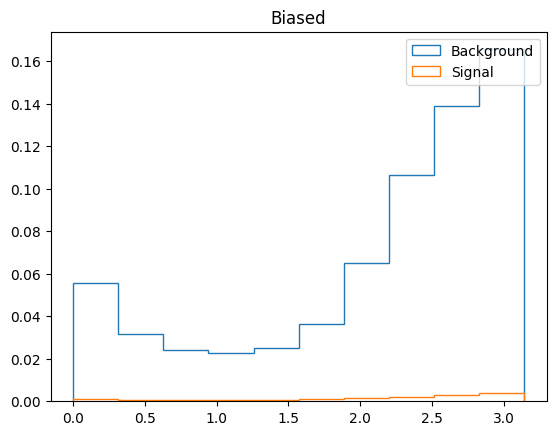

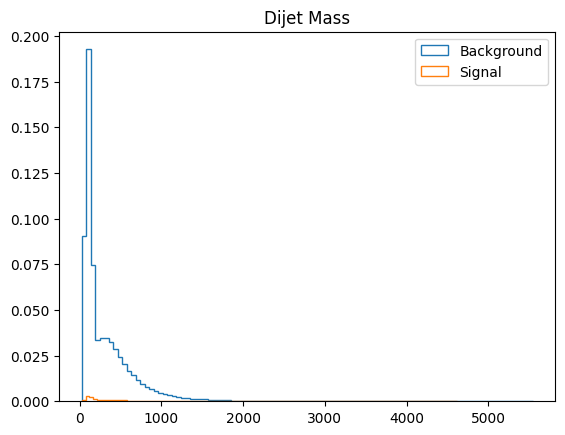

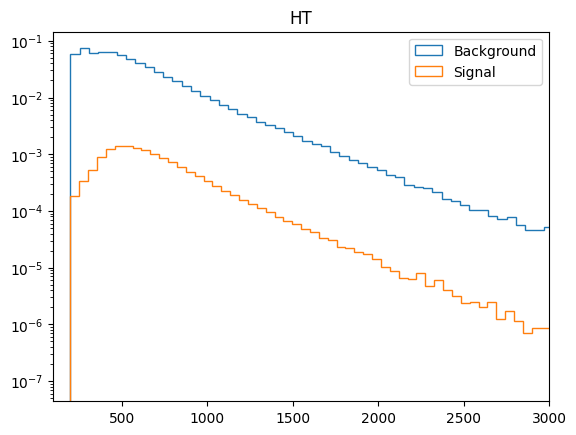

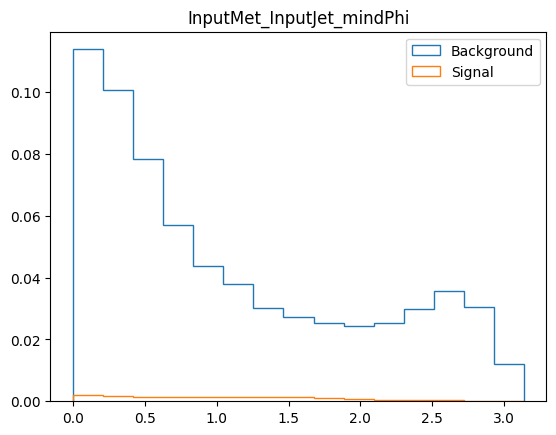

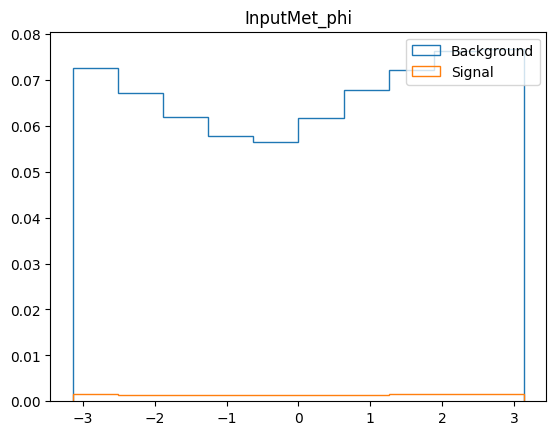

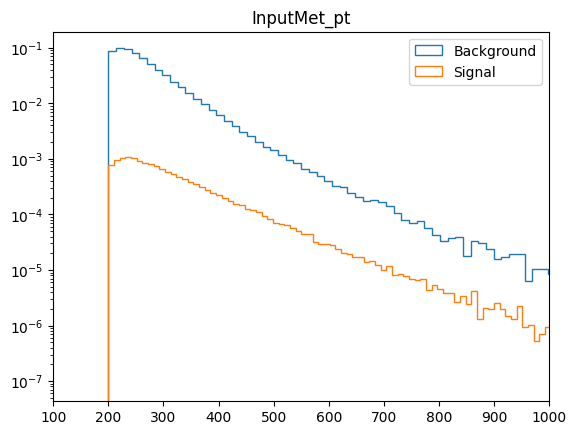

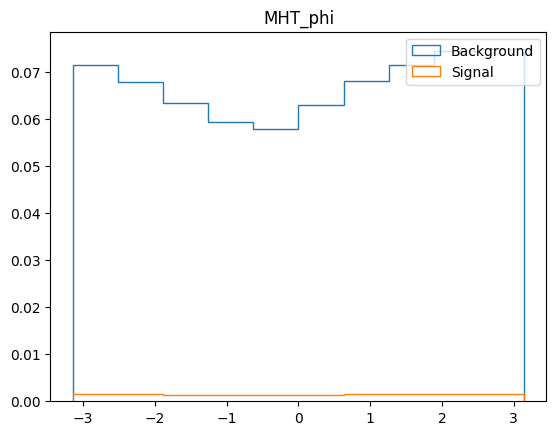

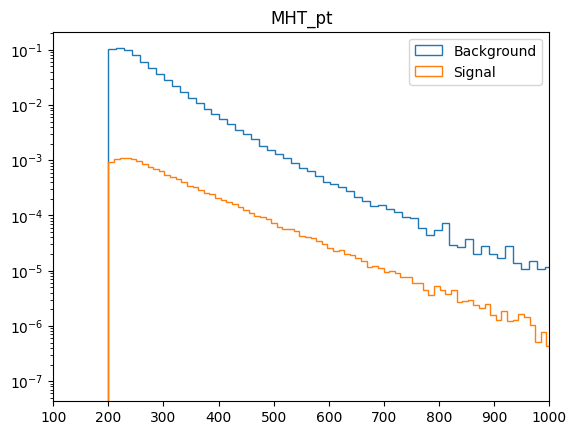

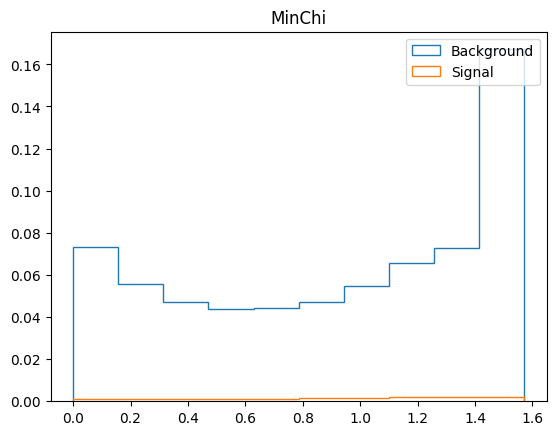

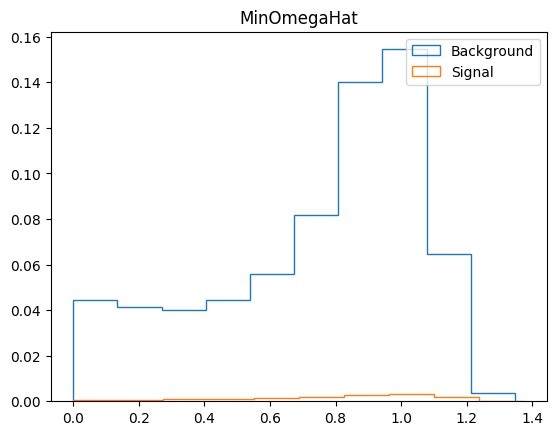

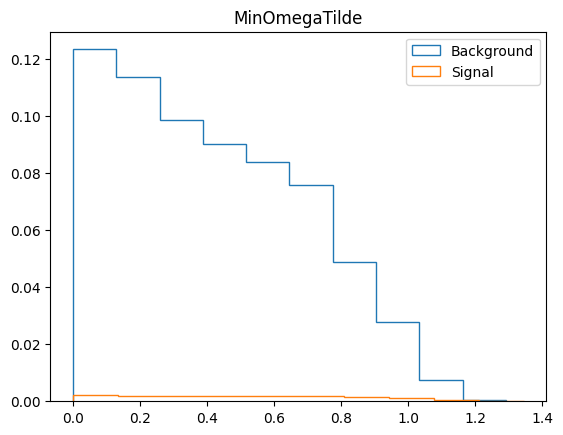

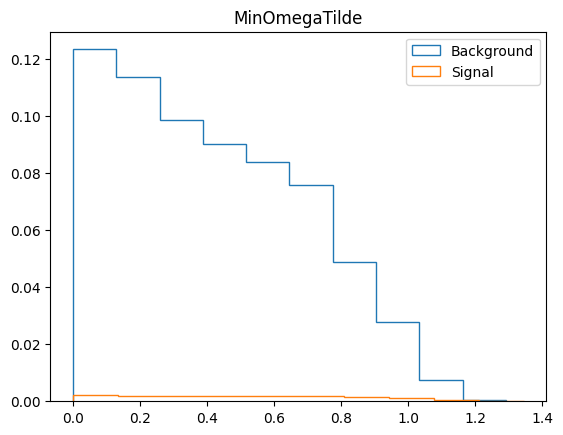

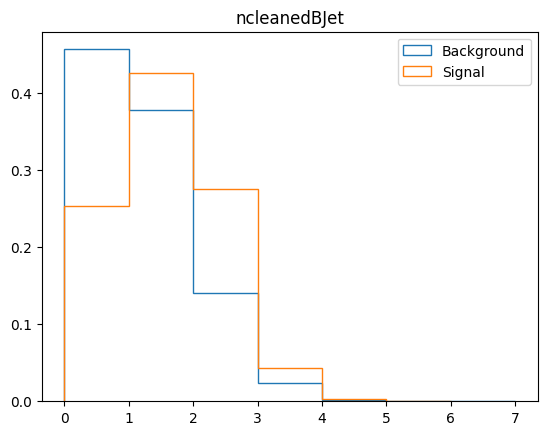

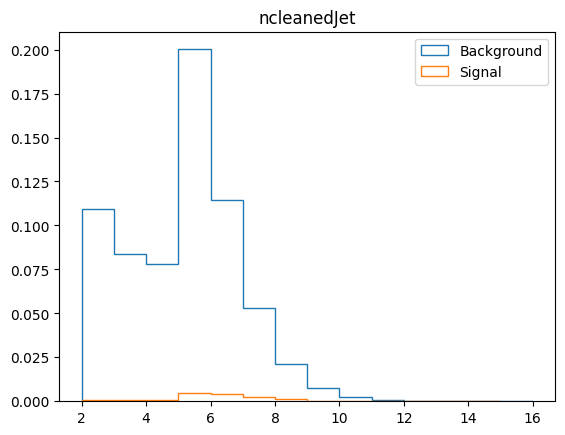

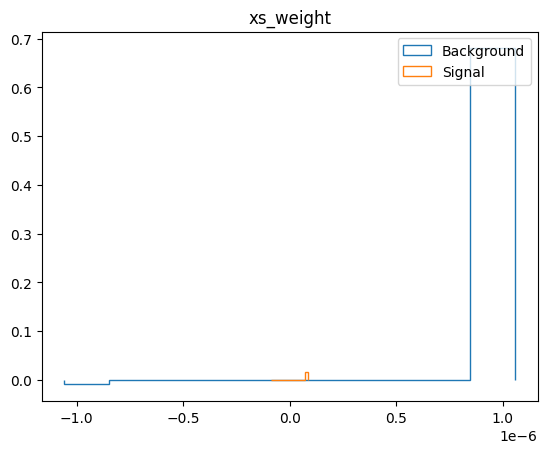

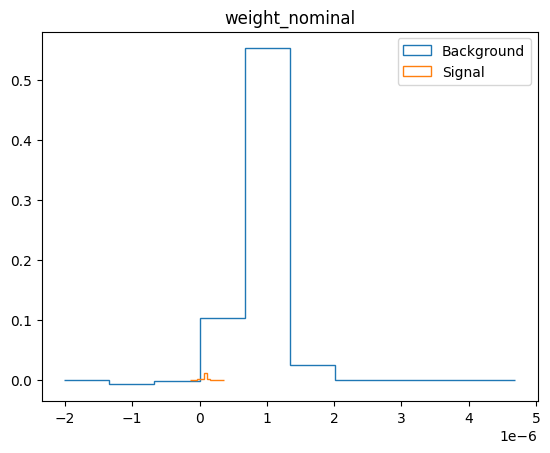

In [8]:

#%%timeit -r 1   # times how long the cell takes to run   #must be first thing in the cell
#4s to run

#Easy Ones (just plot with no manipulation)

#plots all weighted

semi_Biased = df2['BiasedDPhi']
signal_Biased = df4['BiasedDPhi']
plt.hist(x=semi_Biased, bins = 10, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_Biased, bins = 10, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('Biased')
plt.legend()
plt.show()

semi_DiJet_mass = df2['DiJet_mass']
signal_DiJet_mass = df4['DiJet_mass']
plt.hist(x=semi_DiJet_mass, bins =100, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_DiJet_mass, bins =100, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('Dijet Mass')
plt.legend()
#plt.xlim(0,2500)
plt.show()   #are some jets w/ like 5000 mass, anomolous

semi_HT = df2['HT']
signal_HT = df4['HT']
plt.hist(x=semi_HT, bins = 100, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_HT, bins = 100, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.yscale('log')
plt.title('HT')
plt.legend()
plt.xlim(100, 3000)
plt.show()

semi_metjetphi= df2['InputMet_InputJet_mindPhi']
signal_metjetphi= df4['InputMet_InputJet_mindPhi']
plt.hist(x=semi_metjetphi, bins =15, weights = df2.xs_weight, histtype = 'step', label = 'Background')
plt.hist(x=signal_metjetphi, bins =15, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('InputMet_InputJet_mindPhi')
plt.legend()
plt.show()

semi_InputMet_phi= df2['InputMet_phi']
signal_InputMet_phi= df4['InputMet_phi']
plt.hist(x=semi_InputMet_phi, bins =10, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_InputMet_phi, bins =10, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('InputMet_phi')
plt.legend()
plt.show()

semi_InputMet_pt= df2['InputMet_pt']
signal_InputMet_pt= df4['InputMet_pt']
plt.hist(x=semi_InputMet_pt, bins = 150, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_InputMet_pt, bins = 150, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('InputMet_pt')
plt.yscale('log')
plt.legend()
plt.xlim(100,1000)
plt.show()

semi_MHT_phi= df2['MHT_phi']
signal_MHT_phi= df4['MHT_phi']
plt.hist(x=semi_MHT_phi, bins =10, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_MHT_phi, bins =10, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('MHT_phi')
plt.legend()
plt.show()

semi_MHT_pt= df2['MHT_pt']
signal_MHT_pt= df4['MHT_pt']
plt.hist(x=semi_MHT_pt, bins = 150 , weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_MHT_pt, bins = 150 , weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('MHT_pt')
plt.yscale('log')
plt.legend()
plt.xlim(100,1000)
plt.show() 

semi_MinChi= df2['MinChi']
signal_MinChi= df4['MinChi']
plt.hist(x=semi_MinChi, bins =10, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_MinChi, bins =10, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('MinChi')
plt.legend()
plt.show()

semi_MinOmegaHat= df2['MinOmegaHat']
signal_MinOmegaHat= df4['MinOmegaHat']
plt.hist(x=semi_MinOmegaHat, bins =10, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_MinOmegaHat, bins =10, weights = df4.xs_weight, histtype = 'step', label = 'Signal')
plt.title('MinOmegaHat')
plt.legend()
plt.show()

semi_MinOmegaTilde= df2['MinOmegaTilde']
signal_MinOmegaTilde= df4['MinOmegaTilde']
plt.hist(x=semi_MinOmegaTilde, bins =10, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_MinOmegaTilde, bins =10, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('MinOmegaTilde')
plt.legend()
plt.show()

semi_MinOmegaTilde= df2['MinOmegaTilde']
signal_MinOmegaTilde= df4['MinOmegaTilde']
plt.hist(x=semi_MinOmegaTilde, bins =10, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_MinOmegaTilde, bins =10, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('MinOmegaTilde')
plt.legend()
plt.show() 

semi_ncleanedBJet = df2['ncleanedBJet']   #bins need manipulating (did already)
signal_ncleanedBJet = df4['ncleanedBJet']
plt.hist(x=semi_ncleanedBJet, bins = int(np.max(df2['ncleanedBJet']) - np.min(df2['ncleanedBJet'])), weights = df2.xs_weight, density = True, histtype = 'step',  label = 'Background')
plt.hist(x=signal_ncleanedBJet, bins = int(np.max(df4['ncleanedBJet']) - np.min(df4['ncleanedBJet'])), weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('ncleanedBJet')
plt.legend()
plt.show() 

semi_ncleanedJet = df2['ncleanedJet']   #bins need manipulating (did already)
signal_ncleanedJet = df4['ncleanedJet']
plt.hist(x=semi_ncleanedJet, bins = int(np.max(df2['ncleanedJet']) - np.min(df2['ncleanedJet'])), weights = df2.xs_weight, histtype = 'step', label = 'Background')
plt.hist(x=signal_ncleanedJet, bins = int(np.max(df4['ncleanedJet']) - np.min(df4['ncleanedJet'])), weights = df4.xs_weight,  histtype = 'step' , label = 'Signal')
plt.title('ncleanedJet')
plt.legend()
plt.show() 

semi_xs_weight = df2['xs_weight']   # plot to show is wrong, at least 1 -ive val (is this right?)
signal_xs_weight = df4['xs_weight'] 
plt.hist(x=semi_xs_weight, bins = 10, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_xs_weight, bins = 10, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('xs_weight')
plt.legend()
plt.show() 

semi_weight_nominal = df2['weight_nominal']   # plot to check seems reasonable
signal_weight_nominal = df4['weight_nominal']
plt.hist(x=semi_weight_nominal, bins = 10, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_weight_nominal, bins = 10, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('weight_nominal')
plt.legend()
plt.show() 

# Winning Forumla

3023243


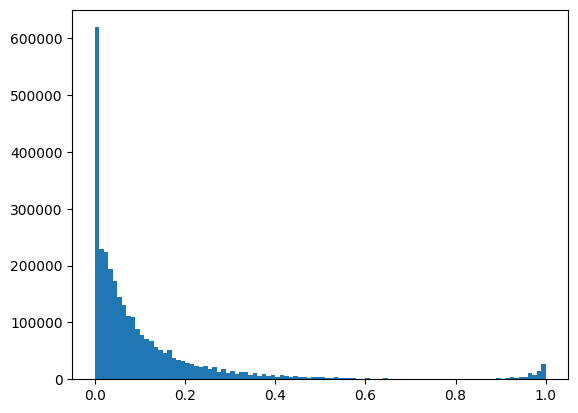

In [10]:
# Makes it all a seperate list is the only issue

df_test = df2['cleanedJet_neHEF'][:]
lst=[]

#Fills in empty array with a zero array
for i, test in enumerate(df_test):
    if test.size == 0:
        df_test[i] = np.zeros(1)

#If array has more than one element, adds it onto the end.
for i in df_test:       
    if i.size>0:
        for j in i:
            lst.append(j)
#print(lst)
print(len(lst))
plt.hist(lst, bins = 100)
plt.show()



In [79]:
semi_cleanedBJet_pt = df2['cleanedBJet_pt'] # not really sure what to do in this case, when multiple b in lots of decays
lst = []
for i in semi_cleanedBJet_pt:
    if len(i) > 1:
        lst.append(len(i))
print(max(lst))   # 7 b quarks max 



7


In [33]:
semi_cleanedBJet_pt = df2['cleanedBJet_pt'] # not really sure what to do in this case, when multiple b in lots of decays
lst = []
for i in semi_cleanedBJet_pt:
    if len(i) < 1:
        lst.append(len(i))
print(len(lst))   # 7 b quarks max 
# 295986 w/ out b quark

295986


The cell below works to put 0's in place of [ ]

In [76]:
df_test = df2['cleanedBJet_pt'][:]

for i, test in enumerate(df_test):
    if test.size == 0:
        df_test[i] = np.zeros(1)
    
print(df_test)    

0             [0.0]
1         [141.625]
2         [54.8125]
3             [0.0]
4             [0.0]
            ...    
651382        [0.0]
651383        [0.0]
651384      [144.0]
651385    [134.125]
651386      [35.25]
Name: cleanedBJet_pt, Length: 651387, dtype: object


For if a row has multiple values:

In [83]:
df_test1 = df_test[:15]
df_test1

for i, test in enumerate(df_test):
    if test.size > 1:
        df_test[i] = np.zeros(1)

0                    [0.0]
1                [141.625]
2                [54.8125]
3                    [0.0]
4                    [0.0]
5                 [85.125]
6                    [0.0]
7                 [168.75]
8                [78.1875]
9                    [0.0]
10               [88.1875]
11                   [0.0]
12    [85.6875, 30.578125]
13       [103.25, 89.8125]
14        [222.0, 93.5625]
Name: cleanedBJet_pt, dtype: object

In [144]:
print(df_test1)
#df2 = pd.read_hdf(input_file2, key="df")


0         [0.0]
1         [0.0]
2         [0.0]
3         [0.0]
4         [0.0]
          ...  
651382    [0.0]
651383    [0.0]
651384    [0.0]
651385    [0.0]
651386    [0.0]
Name: boostedObject_area, Length: 651387, dtype: object


654314


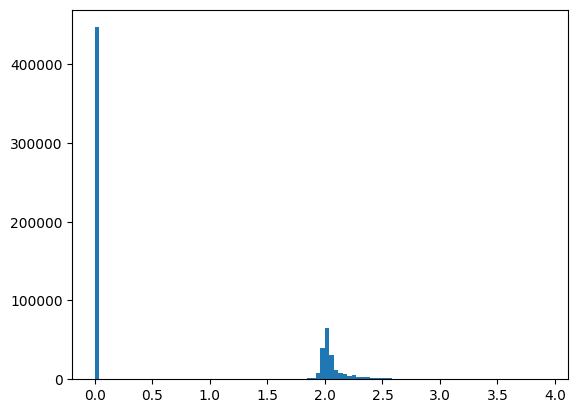

In [14]:
df_test = df2['boostedObject_area'][:]
lst=[]

for i, test in enumerate(df_test):
    if test.size == 0:
        df_test[i] = np.zeros(1)
for i in df_test:       
    if i.size>0:
        for j in i:
            lst.append(j)
#print(lst)
print(len(lst))
plt.hist(lst, bins = 100)
plt.show()

# if [], just get rid of it, don't 

654314


(array([1.74192760e+00, 0.00000000e+00, 7.79769728e-06, 7.79769728e-04,
        5.31841943e-02, 6.99422256e-01, 4.87044172e-02, 6.75280585e-03,
        2.88514800e-04, 3.89884864e-06]),
 array([0.        , 0.39199219, 0.78398437, 1.17597656, 1.56796875,
        1.95996094, 2.35195312, 2.74394531, 3.1359375 , 3.52792969,
        3.91992188]),
 [<matplotlib.patches.Polygon at 0x7f6d98389ea0>])

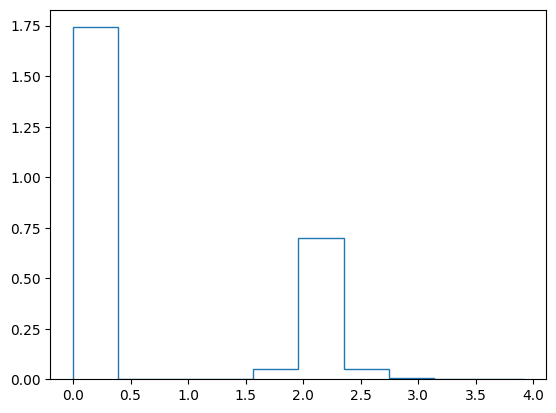

In [15]:
semi_boostedObject_area = df2['boostedObject_area'][:]
lst = []
for i, test in enumerate(semi_boostedObject_area):
    if test.size ==0 :
        semi_boostedObject_area[i] = np.zeros(1)
for i in semi_boostedObject_area:
    if i.size>0:
        for j in i:
            lst.append(j)   # returns a list of the values, not an array now

print(len(lst))
plt.hist(x=lst, bins =10,  density = True, histtype = 'step')
#plt.title('boostedObject_area')
#plt.show() 




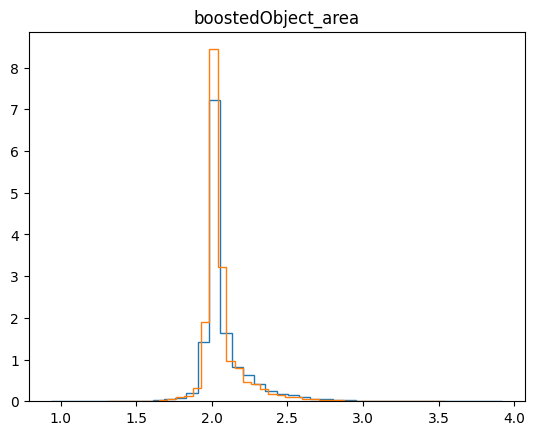

In [13]:
# Plot if dont want empty values = 0, but want them to disregarded.

semi_boostedObject_area = df2['boostedObject_area']
semi_lst=[]
signal_boostedObject_area = df4['boostedObject_area']
signal_lst=[]

for i in signal_boostedObject_area:       
    if i.size>0:
        for j in i:
            signal_lst.append(j)


for i in semi_boostedObject_area:       
    if i.size>0:
        for j in i:
            semi_lst.append(j)

plt.hist(x=semi_lst, bins = 40,  density = True, histtype = 'step')
plt.hist(x=signal_lst, bins = 40,  density = True, histtype = 'step')
plt.title('boostedObject_area')
plt.show() 

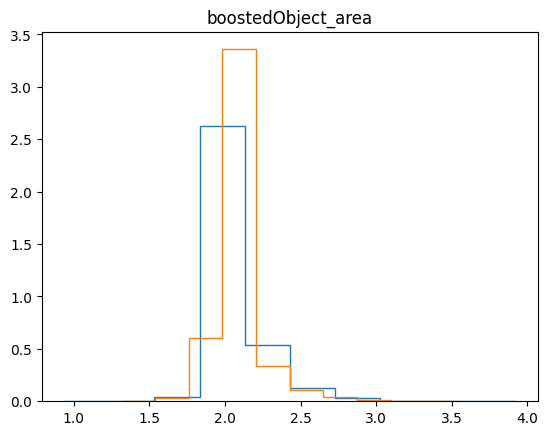

72405
207534


In [18]:
semi_boostedObject_area = df2['boostedObject_area']
semi_boostedObject_area_lst=[]
for i in semi_boostedObject_area:       
    if i.size>0:
        for j in i:
            semi_boostedObject_area_lst.append(j)
signal_boostedObject_area = df4['boostedObject_area']
signal_boostedObject_area_lst=[]
for i in signal_boostedObject_area:       
    if i.size>0:
        for j in i:
            signal_boostedObject_area_lst.append(j)
plt.hist(x=semi_boostedObject_area_lst, bins =10,  density = True, histtype = 'step')
plt.hist(x=signal_boostedObject_area_lst, bins =10,  density = True, histtype = 'step')
plt.title('boostedObject_area')
plt.show() 

print(len(signal_boostedObject_area_lst))
print(len(semi_boostedObject_area_lst))

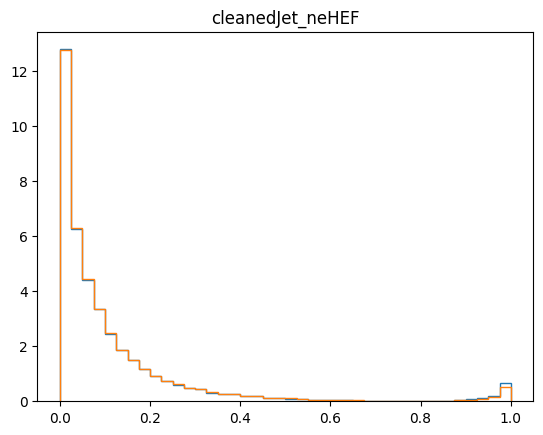

1016215
3023243


In [27]:
semi_cleanedJet_neHEF = df2['cleanedJet_neHEF']
semi_cleanedJet_neHEF_lst=[]
for i in semi_cleanedJet_neHEF:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_neHEF_lst.append(j)
            
signal_cleanedJet_neHEF = df4['cleanedJet_neHEF']
signal_cleanedJet_neHEF_lst=[]
for i in signal_cleanedJet_neHEF:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_neHEF_lst.append(j)
            
plt.hist(x=semi_cleanedJet_neHEF_lst, bins =40, density = True, histtype = 'step')
plt.hist(x=signal_cleanedJet_neHEF_lst, bins =40, density = True, histtype = 'step')
plt.title('cleanedJet_neHEF')
plt.show() 

print(len(signal_cleanedJet_neHEF_lst))
print(len(semi_cleanedJet_neHEF_lst))

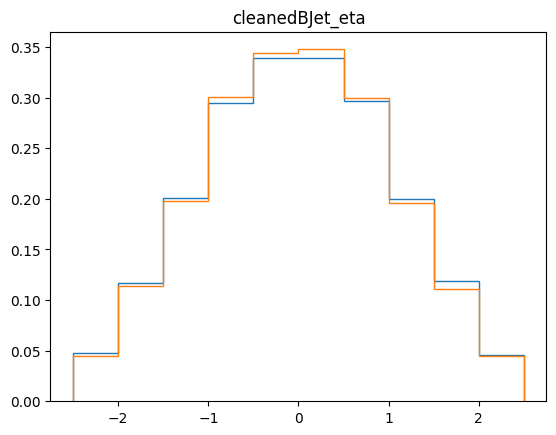

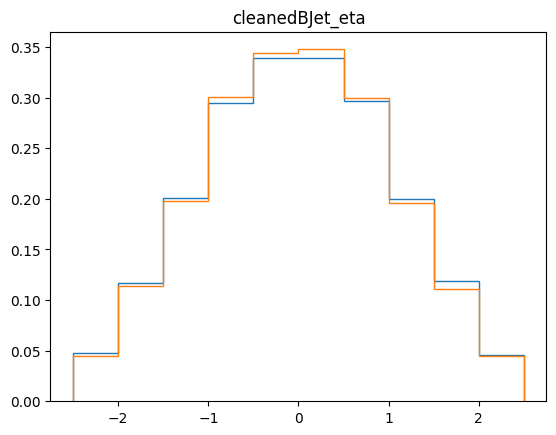

4.25 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [42]:
%%timeit -r 1
semi_cleanedBJet_eta= df2['cleanedBJet_eta']
semi_cleanedBJet_eta_lst=[]
for i in semi_cleanedBJet_eta:       
    if i.size>0:
        for j in i:
            semi_cleanedBJet_eta_lst.append(j)
signal_cleanedBJet_eta= df4['cleanedBJet_eta']
signal_cleanedBJet_eta_lst=[]
for i in signal_cleanedBJet_eta:       
    if i.size>0:
        for j in i:
            signal_cleanedBJet_eta_lst.append(j)
plt.hist(x=semi_cleanedBJet_eta_lst, bins =10, density = True, histtype = 'step')
plt.hist(x=signal_cleanedBJet_eta_lst, bins =10, density = True, histtype = 'step')
plt.title('cleanedBJet_eta')
plt.show() 



In [35]:
%%timeit -r 3 
import numpy as np
a = np.arange(10000)
np.sum(a)
# 19.7 µs ± 9.57 µs per loop (mean ± std. dev. of 3 runs, 10000 loops each)

35.4 µs ± 68.6 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
